In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Data preparation

In [2]:
sdata = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\DatasetV2\magnetichall103update.csv")
sdata1 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\DatasetV2\magnetickitchen206updateV2.csv")
sdata2 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\DatasetV2\magneticroom304update.csv")

sdata.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude', 'CoordinateID']
sdata1.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude', 'CoordinateID']
sdata2.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude', 'CoordinateID']

In [3]:
# Check the shape of the data

print(sdata.shape,
sdata1.shape,
sdata2.shape)


#Exploratory Data Analysis

df = pd.concat([sdata, sdata1, sdata2], axis=0)

df = df.reset_index(drop=True)

df.head(1000)

(1332, 6) (1558, 6) (1610, 6)


,TimeStamp,X,Y,Z,Magnitude,CoordinateID
0,2020-08-19 07:53:37:962,21.240000,-33.360000,-16.560000,25.664200,1
1,2020-08-19 07:53:37:982,21.300000,-33.540000,-16.500000,25.668268,1
2,2020-08-19 07:53:38:002,20.699999,-33.780000,-16.500000,25.163067,1
3,2020-08-19 07:53:38:022,20.939999,-33.660000,-16.320000,25.248880,1
4,2020-08-19 07:53:38:041,20.880000,-33.239998,-16.500000,25.332674,1
...,...,...,...,...,...,...
995,2020-08-19 07:54:39:599,20.939999,-35.579998,-13.259999,23.305603,1
996,2020-08-19 07:54:39:619,21.060000,-36.059998,-13.139999,23.325162,1
997,2020-08-19 07:54:39:640,20.820000,-35.820000,-13.559999,23.360351,1
998,2020-08-19 07:54:39:659,21.000000,-35.520000,-13.679999,23.603016,1


## Data Visualization

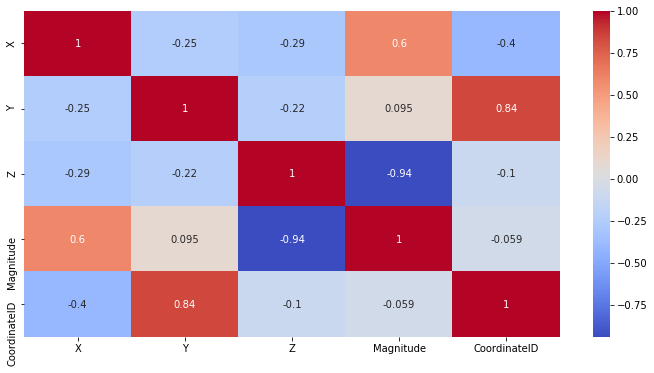

In [4]:
plt.figure(figsize = (12, 6))
sns.heatmap(df[['X', 'Y', 'Z', 'Magnitude', 'CoordinateID']].corr(), cmap = 'coolwarm', annot = True)

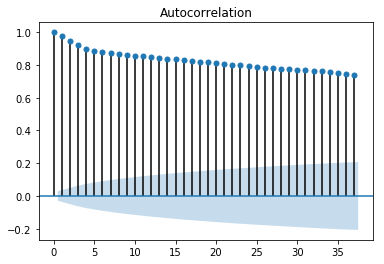

In [5]:
plot_acf(df['X'])
plt.show()

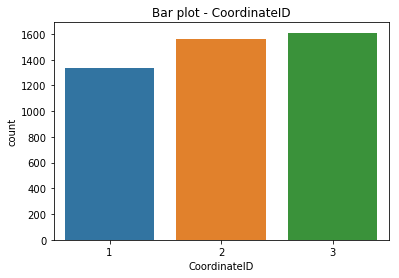

In [6]:
ax = sns.countplot(df['CoordinateID'])
plt.title('Bar plot - CoordinateID')
plt.show()

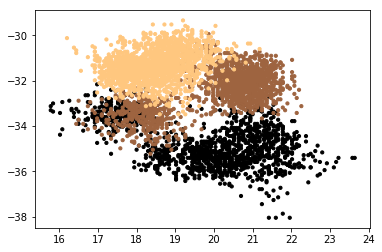

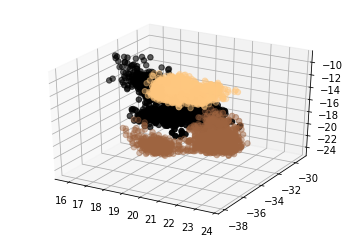

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Create Map
cm = plt.get_cmap('copper')

x, y, z = df['X'], df['Y'], df['Z']
col = df['CoordinateID']

# 2D Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, s=10, c=col, cmap = cm, marker='o')  

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(x, y, z, s=30, c=col, cmap = cm, marker='o')                                                                                

plt.show()

## Classifiers

In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['X', 'Y', 'Z', 'Magnitude']]  # Features
y=df['CoordinateID']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) 

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4050, 4) (450, 4) (4050,) (450,)


In [10]:
from sktime.transformers.series_as_features.summarize import TSFreshFeatureExtractor

classifier = make_pipeline(TSFreshFeatureExtractor(show_warnings=False), RandomForestClassifier())
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

ModuleNotFoundError: No module named 'sktime'

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Test Score: ", knn.score(X_test, y_test))

Test Score:  1.0


In [33]:
knn.score(X_train, y_train)  # To check how well the data is fitting

0.9990123456790123

In [34]:
from sklearn import neighbors
from math import sqrt

from sklearn import metrics
from sklearn.metrics import mean_squared_error

Knn = neighbors.KNeighborsRegressor()
Knn.fit(X_train, y_train)  
error = sqrt(metrics.mean_squared_error( y_test, Knn.predict(X_test))) 
print('RMSE value of the KNN Model is:', error)

RMSE value of the KNN Model is: 0.018856180831641263


In [35]:
Knn.score(X_train, y_train) # To check how well the data is fitting

0.9948198018681275

In [37]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

error = sqrt(metrics.mean_squared_error( y_test, y_pred)) 
print('RMSE value of the KNN Model is:', error)

RMSE value of the KNN Model is: 0.0


In [38]:
clf.score(X_train,y_train)

1.0

In [39]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy1:",metrics.accuracy_score(y_test, y_pred))

Accuracy1: 1.0


In [54]:
from sklearn.metrics import confusion_matrix
v = confusion_matrix(y_test, y_pred)
print(v)

[[147   0   0]
 [  0 143   0]
 [  0   0 160]]


In [55]:
print("true negatives",v[0][0])

print("false negatives",v[1][0])

print("true positives",v[1][1])

print("false positives",v[0][1])

true negatives 147
false negatives 0
true positives 143
false positives 0


In [56]:
from sklearn.metrics import classification_report
target_names = ['1','2','3']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       143
           3       1.00      1.00      1.00       160

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



## Neural Network

In [40]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [45]:
train_df = df.iloc[:,0:6]
train_df

,TimeStamp,X,Y,Z,Magnitude,CoordinateID
0,2020-08-19 07:53:37:962,21.240000,-33.360000,-16.560000,25.664200,1
1,2020-08-19 07:53:37:982,21.300000,-33.540000,-16.500000,25.668268,1
2,2020-08-19 07:53:38:002,20.699999,-33.780000,-16.500000,25.163067,1
3,2020-08-19 07:53:38:022,20.939999,-33.660000,-16.320000,25.248880,1
4,2020-08-19 07:53:38:041,20.880000,-33.239998,-16.500000,25.332674,1
...,...,...,...,...,...,...
4495,2020-08-19 07:47:17:535,19.320000,-31.380000,-14.639999,22.909211,3
4496,2020-08-19 07:47:17:555,19.439999,-31.740000,-14.880000,23.148389,3
4497,2020-08-19 07:47:17:576,19.500000,-31.920000,-14.880000,23.191041,3
4498,2020-08-19 07:47:17:595,19.380000,-31.439999,-14.519999,22.880883,3


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeStamp     4500 non-null   object 
 1   X             4500 non-null   float64
 2   Y             4500 non-null   float64
 3   Z             4500 non-null   float64
 4   Magnitude     4500 non-null   float64
 5   CoordinateID  4500 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 211.1+ KB


In [47]:
train_features = train_df[['Magnitude']]
train_features.shape

(4500, 1)

In [48]:
#Scale transforms data to center to the mean and component wise scale to unit variance
train_AP_features = scale(np.asarray(train_features))

#Convert coordinates to  a string
coordinates = train_df['CoordinateID'].map(str)
train_labels = np.asarray(coordinates)

#convert labels to categorical variables, dummy_labels has type 'pandas.core.frame.DataFrame'
dummy_labels = pd.get_dummies(train_labels)
dummy_labels

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4495,0,0,1
4496,0,0,1
4497,0,0,1
4498,0,0,1


In [51]:
train_labels = np.asarray(dummy_labels) #labels is an array of shape 19937 x 13.
train_labels

#generate len(train_AP_features) of floats in between 0 and 1
train_val_split = np.random.rand(len(train_AP_features))
#convert train_val_split to an array of booleans: if elem < 0.7 = true, else: false
train_val_split = train_val_split < 0.70 #should contain ~70% percent true

train_X = train_AP_features[train_val_split]
train_y = train_labels[train_val_split]
val_X = train_AP_features[~train_val_split]
val_y = train_labels[~train_val_split]

nb_epochs = 30
batch_size = 10
input_size = 1
num_classes = 3 #Total nine coordinates

In [49]:
def encoder():
    model = Sequential()
    model.add(Dense(256, input_dim=input_size, activation='tanh', bias=True))
    model.add(Dense(128, activation='tanh', bias=True))
    model.add(Dense(64, activation='tanh', bias=True))
    return model

def decoder(e):   
    e.add(Dense(128, input_dim=64, activation='tanh', bias=True))
    e.add(Dense(256, activation='tanh', bias=True))
    e.add(Dense(input_size, activation='tanh', bias=True))
    e.compile(optimizer='adam', loss='mse')
    return e

e = encoder()

d = decoder(e)

d.fit(train_X, train_X, nb_epoch=nb_epochs, batch_size=batch_size)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1, activation="tanh", use_bias=True)`
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="tanh", use_bias=True)`
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="tanh", use_bias=True)`
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_dim=64, activation="tanh", use_bias=True)`
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="tanh", use_bias=True)`
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to 


Epoch 1/30
3137/3137 [==============================] - 3s 1ms/step - loss: 0.1043
Epoch 2/30
3137/3137 [==============================] - 2s 623us/step - loss: 0.0901
Epoch 3/30
3137/3137 [==============================] - 2s 561us/step - loss: 0.0903
Epoch 4/30
3137/3137 [==============================] - 1s 467us/step - loss: 0.0897
Epoch 5/30
3137/3137 [==============================] - 1s 412us/step - loss: 0.0894
Epoch 6/30
3137/3137 [==============================] - 1s 354us/step - loss: 0.0896
Epoch 7/30
3137/3137 [==============================] - 1s 358us/step - loss: 0.0884
Epoch 8/30
3137/3137 [==============================] - 1s 402us/step - loss: 0.0878
Epoch 9/30
3137/3137 [==============================] - 1s 400us/step - loss: 0.0878
Epoch 10/30
3137/3137 [==============================] - 1s 375us/step - loss: 0.0876
Epoch 11/30
3137/3137 [==============================] - 1s 363us/step - loss: 0.0878
Epoch 12/30
3137/3137 [==============================] - 1s 359u

In [52]:
def classifier(d):
    d.add(Dense(128, input_dim=64, activation='tanh', bias=True))
    d.add(Dense(128, activation='tanh', bias=True))
    d.add(Dense(num_classes, activation='softmax', bias=True))
    d.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return d

c = classifier(d)

c.fit(train_X, train_y, validation_data=(val_X, val_y), nb_epoch=nb_epochs, batch_size=batch_size , shuffle = True)

loss, acc = c.evaluate(train_AP_features, train_labels)
print(loss, acc)

C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_dim=64, activation="tanh", use_bias=True)`
  
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="tanh", use_bias=True)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="softmax", use_bias=True)`
  after removing the cwd from sys.path.
C:\Users\Anuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 3164 samples, validate on 1336 samples
Epoch 1/30
3164/3164 [==============================] - 2s 756us/step - loss: 0.5208 - accuracy: 0.6757 - val_loss: 0.4912 - val_accuracy: 0.7260
Epoch 2/30
3164/3164 [==============================] - 4s 1ms/step - loss: 0.4824 - accuracy: 0.7089 - val_loss: 0.4647 - val_accuracy: 0.7395
Epoch 3/30
3164/3164 [==============================] - 4s 1ms/step - loss: 0.4702 - accuracy: 0.7168 - val_loss: 0.4483 - val_accuracy: 0.7470
Epoch 4/30
3164/3164 [==============================] - 4s 1ms/step - loss: 0.4756 - accuracy: 0.7149 - val_loss: 0.4673 - val_accuracy: 0.7478
Epoch 5/30
3164/3164 [==============================] - 2s 693us/step - loss: 0.4700 - accuracy: 0.7193 - val_loss: 0.4367 - val_accuracy: 0.7612
Epoch 6/30
3164/3164 [==============================] - 2s 588us/step - loss: 0.4641 - accuracy: 0.7253 - val_loss: 0.4961 - val_accuracy: 0.7418
Epoch 7/30
3164/3164 [==============================] - 2s 539us/step - loss: 0.46

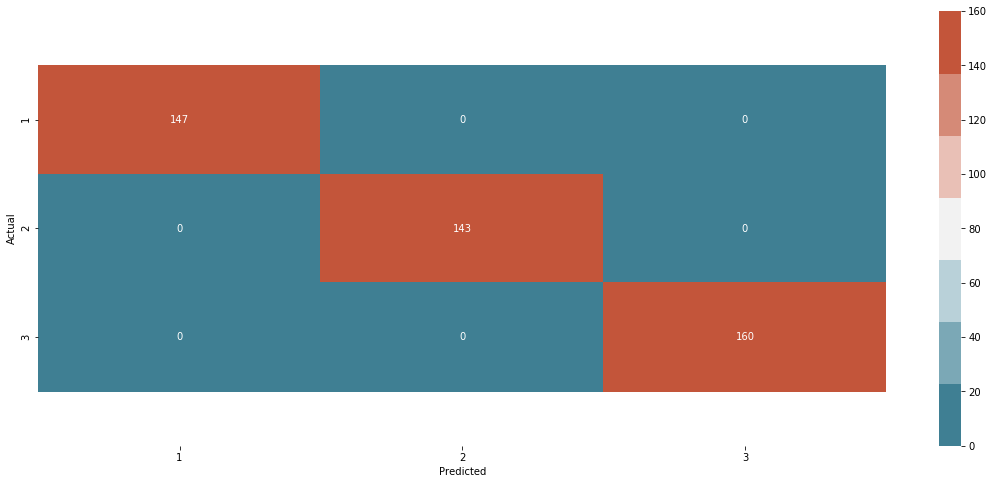

In [57]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(19, 8)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

plot_cm(
  y_test,
  y_pred,
  class_names = [1,2,3]
)